### 과제 할일 정리
- (필수) 강의내용 및 실습 코드 정리
- (필수) Crawling_exercise1
- (선택) Crawling_exercise2 
- (선택) 본인 데이터 적용

In [2]:
from IPython.display import Image

## 텍스트마이닝의 이론과 실제

### 텍스트마이닝의 이해

#### 텍스트마이닝이란?
- 텍스트로부터 고품질의 정보를 이끌어내는 과정
- 비정형 데이터를 분석 가능한 정형 형태로 바꿈
- 일정한 길이의 vector로 변환하고 변환된 vector에 머신러닝(딥러닝) 기법 적용

#### 텍스트 마이닝 방법
- NLP ex) Tokenize, Chunking, BOW, TFIDF
- 머신러닝(딥러닝)

#### 텍스트마이닝 도구 - 파이썬
- NLTK
- Scikit Learn
- Gensim
- Keras

-----------------------

### 텍스트마이닝 방법론

#### 텍스트마이닝 기본도구
- Tokenize:대상이 되는 문서/문장을 최소 단위로 쪼갬
- Text normalization: 최소 단위를 표준화
- POS-tagging: 최소 의미단위로 나누어진 대상에 대해 품사를 부착
- Chunking: POS-tagging의 결과를 명사구, 형용사구, 분사구 등과 같은 말모듬으로 다시 합치는 과정
- BOW, TFIDF: tokenized 결과를 이용하여 문서를 vector로 표현

#### BOW
- Vector Space Model
    - 문서를bag of words로 표현
    - 단어가 쓰여진 순서는 무시
    - 유(1)/무(0) 로 문서를 표현
- count vector
    - 문서에 나타난 횟수로 표현
    - count가 weight로 작용
    - 많은 문서에 공통적으로 나타난 단어는 중요성이 떨어질 가능성이 높음
    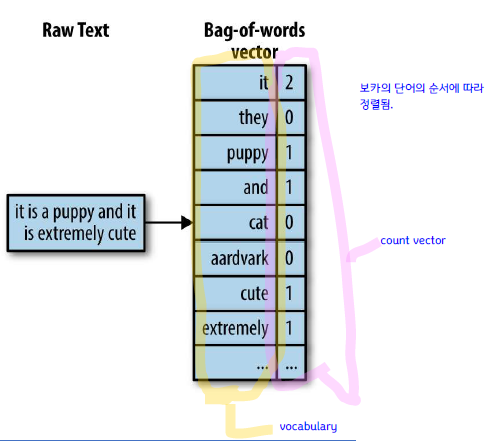

#### TFIDF
- 단어의 count를 단어가 나타난 문서의 수로 나눠서 자주 등장하지 않는 단어의 weight를 올림
- tf(d, t): 문서 d에 단어 t가 나타난 횟수, count vector와 동일, 로그스케일 등 다양한 변형이 있음
- df(t): 전체 문서 중에서 단어 t를 포함하는 문서의 수
- idf(t): df(t)의 역수를 바로 쓸 수도 있으나, 여러가지 이유로 로그스케일과 스무딩을 적용한 공식을 사용, log(n/(1+df(t)), n은 전체 문서 수

---------------------------------

### 텍스트마이닝의 문제

#### Curse of Dimensionality
- 차원의 저주
    - Extremely sparse data (극도로 희소한 데이터)
    - 데이터간 거리가 너무 멀게 위치
- 해결방법
    - 더 많은 데이터 (but 데이터를 다루기 어려워짐)
    - Dimension reduction
        - feature selection
        - feature extraction

#### 단어 빈도의 불균형
- Zipf’s law(멱법칙)
    - 극히 소수의 데이터가 결정적인 영향을 미치게 됨
- 해결방안
    - feature selection
        - 빈도 높은 단어를 삭제
        - 심한 경우 50% 삭제
    - Boolean BOW 사용
        - 1이상이면 1로 변환
        - log 등의 함수를 이용해 weight를 변경

#### 단어가 쓰인 순서정보의 상실
- Loss of sequence information
    - 단어들의 순서 - context가 중요
    - 번역에서는 특히 더 중요
- 해결방안
    - n-gram (부분적 해결)
    - 딥러닝
        - RNN, Attention, Transformer, BERT

--------------------------------------

### 문제의 해결 방안

#### Dimensionality Reduction (차원 축소)
- Feature selection (ex. 10000개가 있다면 100개를 골라내고, 나머지 9900개는 버린다)
- Feature extraction
- Embedding (단어나 다큐먼트를 dense한 벡터로 학습을 통해 압축시킨다.)
- Deep Learning

#### Feature Extraction
- PCA: 데이터의 분산을 최대한 보존하는 새로운 축을 찾아 변환함으로써 차원을 축소
    - 고유값이 큰 순서대로 고유벡터를 정렬해 차원 선택
    - 선택된 고유벡터와 X의 선형결합으로 차원 축소

#### Topic Modeling
- Documents are mixtures of topics
- A topic is a probability distribution over words
- 다큐먼트에서 각각의 토픽과 단어들이 어떤 비중으로 이루어졌는지 알고 싶을 때 사용하는 모델링
- 토픽은 주제를 의미하는 용어로 사용되며, 각 문서들이 특정한 주제에 속할 확률분포와 주제로부터 특정 단어들이 파생되어 나올 확률분포가 주어졌을 때, 이 두 확률분포를 조합하여 각 문서들에 들어가는 단어들의 확률분포를 계산
    - 활용사례) 
        - 드라마 시청률 변화 <-> 소셜미디어 토픽 변화
            - 시청률이 변화하면 소셜미디어에 쓰이는 토픽이 변할 수 있고, 그 반대도 가능하다.
        - My Love from the Star
            - 어떤 토픽이 상승하면 드라마의 시청률이 상승할 것인지 예측가능하다
            - 인기있는 드라마는 토픽들이 일치하는 경우가 많다.

#### Word Embedding
- 단어에 대한 vector의 dimension reduction이 목표
- one-hot-encoding으로 표현된 단어를 dense vector로 변환
    - one-hot-encoding: extremely sparse
        - 문제점) 벡터의 길이가 너무 커진다.
- 최종목적에 맞게 학습에 의해 vector가 결정됨

#### Word2Vec
- 문장에 나타난 단어들의 순서를 이용해 word embedding을 수행
    - CBOW: 주변단어들을 이용해 다음 단어를 예측
    - Skip-gram: 한 단어의 주변단어들을 예측
- Word2Vec의 학습방법
    - sliding window를 이용한 학습 set 구성
        - 주어진 주변 단어들을 입력했을때, target word의 확률이 높아지도록 학습 혹은 그 반대 
    - embedding vector
        - input이 one-hot vector이므로 W가 embedding vector의 집합이 됨
- Word2Vec의 의미
    - 단어의 위치에 기반하여 의미를 내포하는 vector 생성
    
#### ELMo (Embeddings from Language Model)
- 기존 Word2Vec이나 GloVe 등은 동일한 단어가 문맥에 따라 다른 의미를 가지는 걸 반영하지 못했지만 ELMo는 문맥을 반영하기 위해 개발된 워드 임베딩 기법 
- biLSTM

#### Document Embedding
- Word2Vec 모형에서 주변단어들에 더하여 document의 고유한 vector를 함께 학습함으로써 document에 대한 dense vector를 생성

#### RBM (Restricted Boltzmann Machine)
- 딥러닝의 문을 열어준 기술. 현재는 많이 쓰이지 않음
- 차원을 변경하면서 원래의 정보량 유지가 목적

#### Autoencoder
- RBM과 유사한 개념
    - encoder로 차원을 축소하고 decoder로 다시 복원했을 때, 원래의 X와 복원한 X’이 최대한 동일하도록 학습

#### Context(sequence)의 파악
- N-gram
    - 대상이 되는 문자열을 하나의 단어 단위가 아닌, 두개 이상의 단위로 잘라서 처리
    - 문제점) 문맥 파악에 유리하나, dimension이 더욱 증가
- 딥러닝 – RNN
    - hidden node가 X 뿐만 아니라 이전 hidden node로부터도 입력을 받음
    
#### LSTM (Long Short Term Memory)
- RNN의 문제)
    - 문장이 길수록 층이 깊은 형태를 갖게 됨 -> 경사가 소실되는 문제 발생 -> 앞부분의 단어 정보가 학습되지 않음
- LSTM: 직통 통로 만들어 RNN 문제 해결
- Bi-LSTM
    - 양방향으로 LSTM을 구성하여 두 결과를 합침
    - 양방향 순서를 모두 학습

#### Sequence-to-sequence
- 지금까지는 입력은 sequence, 출력은 하나의 값인 경우가 일반적이었으나, 번역, chat-bot, summarize등은 출력도 sequence가 되어야 함
- encoder, decoder의 구조를 가짐


#### Attention
- 출력에 나온 어떤 단어는 입력에 있는 특정 단어들에 민감한 것에 착안
- 입력의 단어들로부터 출력 단어에 직접 링크를 만듦

#### Transformer (Self-attention)
- 입력 단어들끼리도 상호연관성이 있는 것에 착안
- 셀프 어텐션이 한 문장안에서 즉, 인코더 안에서 혹은 디코더 안에서 각각 셀프 어텐션이 있다는 사실을 알아냄

#### BERT (Bidirectional Encoder Representations form Transformer)
- 양방향 transformer 인코더를 사용
- transfer learning에서 feature + model을 함께 transfer하고 fine tuning을 통해서 적용하는 방식을 선택
- 거의 모든 분야에서 top score를 기록

----------------------------------------

# 실습코드 정리

- koNLPy corpus 대한민국헌법 텍스트 파일을 로드

In [16]:
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()

In [17]:
print(type(c)) #가져온 데이터의 type을 확인
print(len(c))
print(c[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


#### NLTK를 이용한 tokenize 시도

In [18]:
# 텍스트마이닝 도구
# 가장 잘 알려진 NLP 라이브러리
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
c_sent = sent_tokenize(c)
print(len(c_sent))
print(c_sent[:5])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


357
['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.', '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.', '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.', '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.', '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.']


In [20]:
#word로 tokenize
from nltk.tokenize import word_tokenize
c_words = word_tokenize(c)
len(c_words)

4640

In [22]:
" ".join(c_words[:50])

'대한민국헌법 유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고 , 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고 , 모든 사회적 폐습과 불의를 타파하며 , 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히'

*한글은 nltk로 잘 tokenize되지 않는다.*


### koNLPy의 형태소 분석 및 품사 태깅 기능 사용법


In [24]:
from konlpy.tag import Okt
okt = Okt()
tokens_c = okt.morphs(c) #형태소 단위로 tokenize

In [30]:
len(tokens_c)

8796

In [31]:
type(tokens_c)

list

In [35]:
" ".join(tokens_c[:50])

'대한민국 헌법 \n\n 유구 한 역사 와 전통 에 빛나는 우리 대 한 국민 은 3 · 1 운동 으로 건립 된 대한민국 임시정부 의 법 통과 불의 에 항거 한 4 · 19 민주 이념 을 계승 하고 , 조국 의 민주 개혁 과 평화 적 통일 의 사명'

### nltk의 Text class를 이용하여 다양한 기능을 수행

In [66]:
import nltk
c_nltk_text = nltk.Text(tokens_c, name = "대한민국헌법") #tokens_c 대신 c를 쓰면 어떻게 될까?
c_nltk_text

<Text: 대한민국헌법>

In [67]:
# 모든 단어의 수
print(len(c_nltk_text.tokens))
# 서로 다른 단어의 수
print(len(set(c_nltk_text.tokens)))

8796
1364


In [68]:
#단어와 단어의 빈도를 dictionary 형태로 표현 
c_nltk_text.vocab()

FreqDist({'의': 380, '.': 357, '에': 282, '을': 211, '\n': 195, '은': 179, '제': 178, '이': 176, '한다': 155, '·': 145, ...})

#### 한글 폰트 설정

In [39]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [69]:
# 공백 제외하고 나머지 문자열의 길이가 둘 이상인 단어만 포함
tokens_new = []
for token in tokens_c:
    if len(token.strip()) > 1:
        tokens_new.append(token.strip())
print(len(tokens_new))

4520


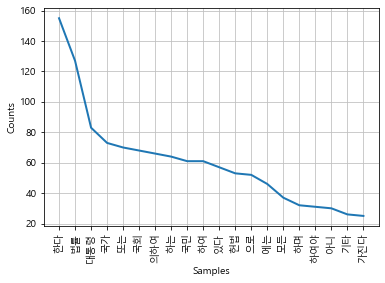

In [70]:
%matplotlib inline
c_nltk_text = nltk.Text(tokens_new, name = "대한민국헌법")
c_nltk_text.plot(20)

In [71]:
#특정 단어의 빈도 알기
c_nltk_text.count('민주')

6

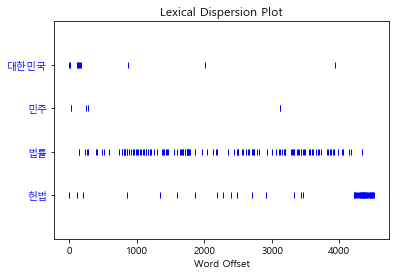

In [51]:
# 단어들 중 주어진 단어들의 위치를 표시
c_nltk_text.dispersion_plot(['대한민국', '민주', '법률', '헌법'])

### context 보기
- concordance(): 주어진 단어를 중심으로 앞 뒤의 단어들을 보여 줌

In [72]:
c_nltk_text.concordance('헌법')

Displaying 25 of 53 matches:
대한민국 헌법 유구 역사 전통 빛나는 우리 국민 운동 으로 건립 대한민국 임시정부
원히 확보 다짐 하면서 1948년 7월 12일 제정 되고 걸쳐 개정 헌법 이제 국회 의결 거쳐 국민투표 의하여 개정 한다 1조 대한민국 민주
방위 신성한 의무 수행 사명 으로 하며 정치 중립성 준수 된다 6조 헌법 의하여 체결 공포 조약 일반 으로 승인 국제 법규 국내법 같은 효력
청원 권리 가진다 국가 청원 대하 심사 의무 진다 27조 모든 국민 헌법 법률 법관 의하여 법률 의한 재판 받을 권리 가진다 군인 또는 군무
한다 모든 국민 보건 하여 국가 보호 받는다 37조 국민 자유 권리 헌법 열거 되지 아니한 이유 경시 되지 아니 한다 국민 모든 자유 권리 
시 하여야 한다 48조 국회 의장 인과 부의 선출 한다 49조 국회 헌법 또는 법률 특별한 규정 없는 재적 의원 과반수 출석 출석 의원 과반
 에서 예산안 의결 까지 다음 목적 경비 년도 예산 하여 집행 있다 헌법 이나 법률 의하여 설치 기관 또는 시설 유지 운영 법률상 지출 의무
위원회 위원 감사원장 감사 위원 기타 법률 공무원 직무 집행 있어서 헌법 이나 법률 배한 에는 국회 탄핵 의결 있다 항의 탄핵 국회 재적 의
 대하 국가 대표 한다 대통령 국가 독립 영토 보전 국가 계속 성과 헌법 수호 책무 진다 대통령 조국 평화 통일 성실한 의무 진다 행정권 대
이내 후임 선거 한다 69조 대통령 취임 즈음 하여 다음 선서 한다 헌법 준수 하고 국가 보위 하며 조국 평화 통일 국민 자유 복리 증진 민
교사절 신임 접수 또는 파견 하며 선전포고 강화 한다 74조 대통령 헌법 법률 하는 의하여 국군 통수 한다 국군 조직 편성 법률 한다 75조
 계엄 해제 요구 에는 대통령 이를 해제 하여야 한다 78조 대통령 헌법 법률 하는 의하여 공무원 임면한 79조 대통령 법률 하는 의하여 사
 한다 국정 계획 정부 일반 정책 선전 강화 기타 중요한 대외 정책 헌법 개정안 국민투표 조약 법률 

similar(): 주어진 단어와 비슷한 context에서 사용된 단어들을 반환

In [73]:
c_nltk_text.similar('헌법')

의하여 공포 행위 공공필요 국무총리 자격 정년


### 명사만 추출해서 처리

In [77]:
nc = okt.nouns(c)
print(len(nc))
print(" ".join(nc[:50]))

3882
대한민국 헌법 유구 역사 전통 우리 국민 운동 건립 대한민국 임시정부 법 통과 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입 각하 정의 인도 동포 애 로써 민족 단결 공고 모든 사회 폐습 불의 타파 자율 조화 바탕 자유민주 질서 더욱 정치 경제 사회 문화 모든


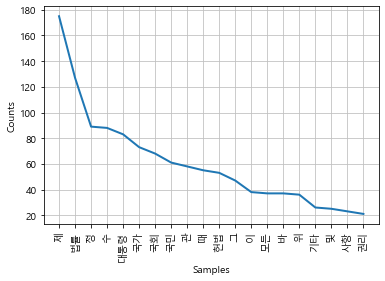

In [78]:
ncnt = nltk.Text(nc, name = "Okt명사")
ncnt.plot(20)

#### 한글 Word Cloud
- 영어와 달리 깨지지 않게 한글폰트 지정 필요

In [121]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
font_path = 'c:/Windows/Fonts/malgun.ttf' #한글 폰트의 위치를 지정

### 외부 csv파일에서 필요한 부분만 word cloud 그리기

In [84]:
df = pd.read_csv('movie_data.csv', header=None, names=['review', 'rate', 'name'])
df.columns.tolist()

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


['review', 'rate', 'name']

In [85]:
df.head()

,review,rate,name
0,오~~ 종합선물셋트,9,인피니티 워
1,크레딧 올라올때부터 충격먹었어요 ㅋㅋㅋㅋ 나중에 더큰 활약기대하겠습니다! 와칸다포에...,10,인피니티 워
2,이제 남은건타노스 밖에,10,인피니티 워
3,타노스는 발암물질이다.,9,인피니티 워
4,정말재미있게봤습니다,10,인피니티 워


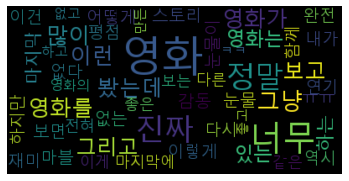

In [88]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 50,
    #width = 800,
    #height = 800, 
    #background_color='white',
    max_words=50
)

wordcloud = wordcloud.generate(" ".join(df.review.tolist())) #review column의 내용을 가져와서 word cloud 그리기
 
fig = plt.figure()
#fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')

----------------------------------
# 본인 데이터 실습

- 평소 즐겨하는 게임 카트라이더의 구글 플레이 스토어 리뷰를 셀레니움으로 크롤링해 텍스트마이닝 실습을 해보겠다.

In [105]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

DRIVER_PATH = 'C:/Pselenium/chromedriver.exe'

url = 'https://play.google.com/store/apps/details?id=com.nexon.kart&showAllReviews=true'

driver = webdriver.Chrome(DRIVER_PATH)
driver.get(url)

driver.implicitly_wait(10) #10초 기다림

cnt = 0
while(cnt<10):#10번 스크롤을 내림
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    cnt+=1
    time.sleep(0.5)
html = driver.page_source
driver.quit()

bsObj = BeautifulSoup(html, 'lxml')

div_reviews = bsObj.find_all("div", {"class":"d15Mdf bAhLNe"})
print(len(div_reviews))#200개 수집 성공

200


In [119]:
reviews = []

for div in div_reviews[:200]:
    try: 
        grade = len(div.find_all('div',{'class':'vQHuPe bUWb7c'}))#평점

        date_ = div.find('span', {"class":"p2TkOb"}).get_text()
        t = re.findall(r"\d*\.\d+|\d+", date_)
        date = '{0}-{1}-{2}'.format(t[0], t[1], t[2])#작성일
        good = div.find('div', {"class":"jUL89d y92BAb"}).get_text()#공감수
        content = div.find('span', {"jsname":"bN97Pc"}).get_text()
        content = content.replace("전체 리뷰", "")
        content = re.sub('[^가-힝0-9a-zA-Z_!?@#%^&-=:;,\"\'<>\\s]', '', content)
        content.encode('utf-8')#리뷰 내용
        reviews.append((content, grade, good, date)) # 리뷰 저장
    except Exception:
        continue

In [120]:
import csv

with open("kartrider_review.csv", 'wt', encoding='utf-8', newline='') as file:
    csvWriter = csv.writer(file)
    csvWriter.writerow(["내용", "평점", "공감수", "작성일"])
    for rev in reviews:
        csvWriter.writerow(rev)

In [123]:
kartrider_df = pd.read_csv('kartrider_review.csv')
kartrider_df.head()

,내용,평점,공감수,작성일
0,무과금으로 플레이하는 유저입니다. 게임 자체는 굉장히 좋습니다. 그래픽도 화려해서 ...,4,186,2020-9-25
1,전체적으로 좋은차는 거이 다 현질을 해야합니다. 물론 무과금인 차도 있긴 하지만 대...,3,163,2020-9-25
2,이건 아주 잘만들었습니다 하지만 방향키가 가끔 안눌려서 꼴등이되죠. 제 폰이 이상한...,5,21,2020-9-25
3,장점1:정말 시간보내기가 좋고 캐주얼한 게임이라 정말재미있어요. 장점2:친구랑 하면...,3,137,2020-9-25
4,게임 재미있게 잘 플레이하고 있는 유저입니다. 다름이 아니라 2분도 안되는 게임 시...,2,1,2020-9-26


<Figure size 720x360 with 0 Axes>

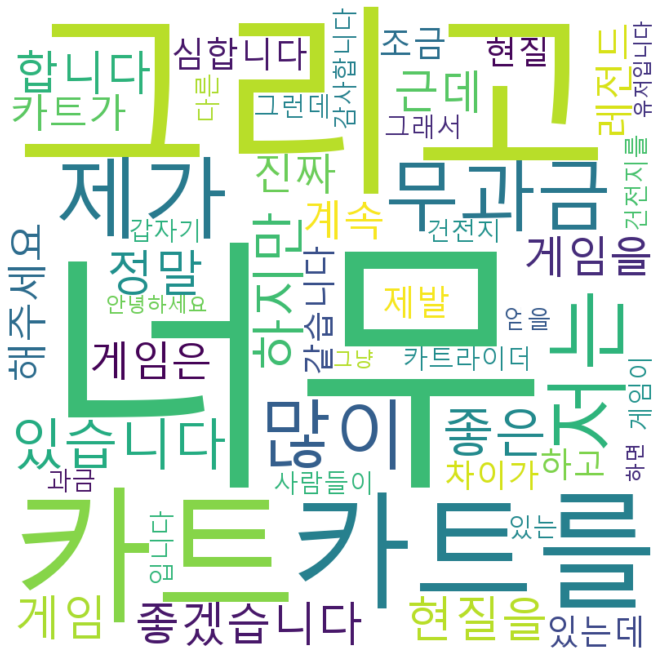

In [165]:
# 상위 50개의 단어로 워드클라우드
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    max_words = 50,
    background_color='white',
)

wordcloud = wordcloud.generate(" ".join(kartrider_df.내용.tolist())) #review column의 내용을 가져와서 word cloud 그리기
 
fig = plt.figure()
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')

#### 자세한 토큰 분석을 위해 형태소 단위로 바꿔주겠다.

In [133]:
review = kartrider_df.내용.tolist()

In [166]:
#list를 str로 바꿈
review_str = ""
for s in review:
    review_str += s

In [159]:
#type 확인
print(type(review_str))

<class 'str'>


In [143]:
from konlpy.tag import Okt
okt = Okt()
tokens_review = okt.morphs(review_str) #형태소 단위로 tokenize

In [144]:
len(tokens_review)

16668

In [149]:
#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [150]:
import nltk

tokens_new = []
for token in tokens_review:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        tokens_new.append(token.strip())
print(len(tokens_new))

10267


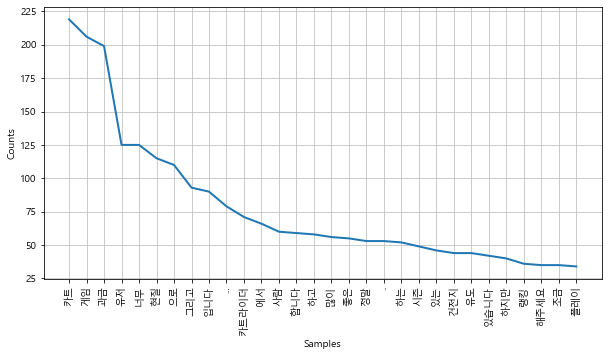

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5] # 그래프 사이즈를 키움
r_nltk_text = nltk.Text(tokens_new, name = "카트라이더 리뷰")
r_nltk_text.plot(30) #상위 30개 단어로 그래프 그리기

- 유저들의 리뷰에서 "과금"이란 단어의 빈도수가 눈에 띈다.
- 뒤를 이어 "현질", "유도" 등 해당 게임에선 돈과 관련해 유저들의 불만사항이 나타나 있음을 확인할 수 있었다.